In [1]:
# Pour faire apparaître les graphes sous forme d'images .png dans le notebook
%matplotlib inline
import csv
import numpy as np
from scipy.signal import *
from numpy.fft import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10}) # pour augmenter la taille de caractère dans les graphiques
from ipywidgets import * # Pour insérer des widgets (éléments graphiques) dans le notebook
# Attention! Installer scikit-learn pour avoir accès aux algorithmes de classification
# Installer version 0.20 au plus récente (0.22.1) pour avoir accès à la nouvelle fonction tree.plot_tree()
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier # Méthode KNN
from pandas import * # Structures de données
from sklearn.naive_bayes import GaussianNB
from scipy.ndimage import interpolation

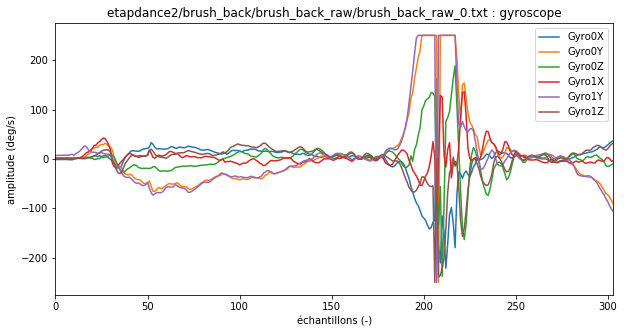

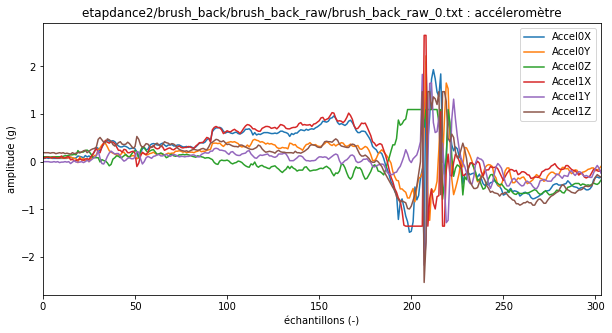

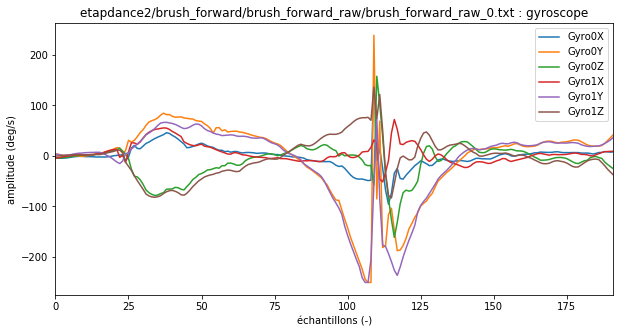

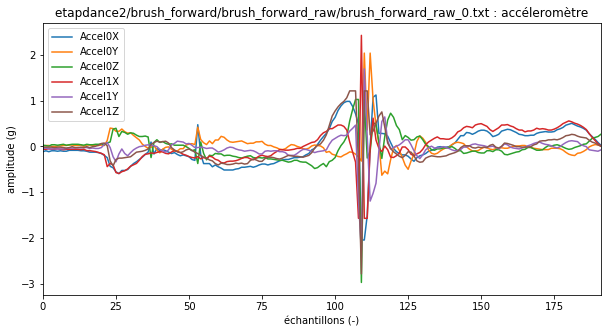

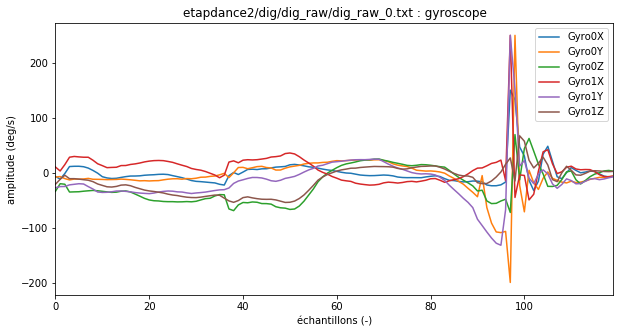

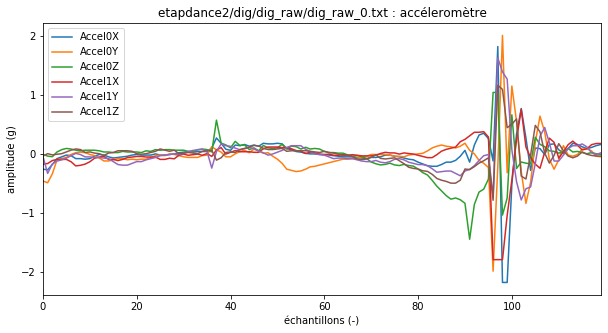

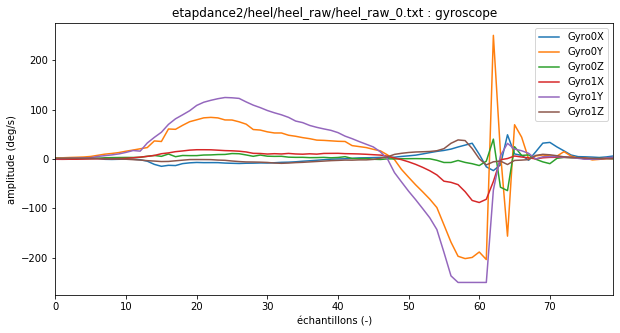

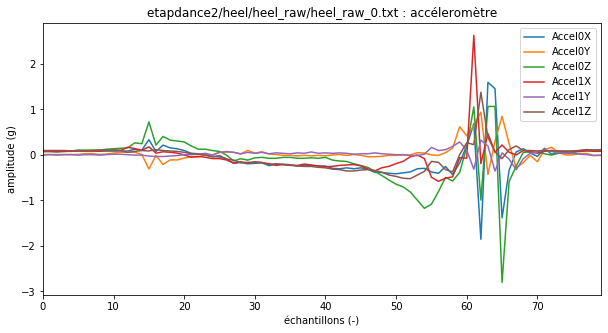

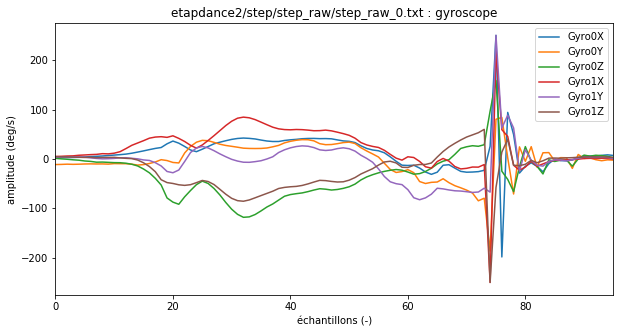

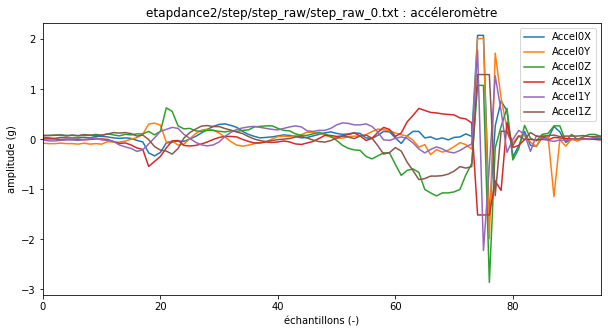

In [5]:
#\etapdance2\step_type\step_type_raw_nb.txt

#dimensions graphiques
largeur=10
hauteur=5

step_type_array = ["brush_back","brush_forward","dig","heel","step"]
#size_array = [25,25,23,21,22]
size_array = [0,0,0,0,0]
ext = ".txt"

for i in range(len(size_array)):
    step_type = step_type_array[i]
    size = size_array[i]
    
    path_int =  "etapdance2" + "/" + step_type + "/" + step_type + "_raw" + "/" + step_type + "_raw_"

    for n in range(size+1):
        step_type_nb = str(n)
        ext = ".txt"
        data_input = path_int + step_type_nb + ext

        data_raw = pandas.read_csv(data_input,names=['Time (ms)','Gyro0X (deg)','Gyro0Y (deg)','Gyro0Z (deg)','Accel0X (g)','Accel0Y (g)','Accel0Z (g)','Gyro1X (deg)','Gyro1Y (deg)','Gyro1Z (deg)','Accel1X (g)','Accel1Y (g)','Accel1Z (g)'], dtype='a') 

        Time = np.array(data_raw['Time (ms)'])[1:].astype(float)

        # MPU0 6050 (talon)
        g0x = np.array(data_raw['Gyro0X (deg)'])[1:].astype(float)
        g0y = np.array(data_raw['Gyro0Y (deg)'])[1:].astype(float)
        g0z = np.array(data_raw['Gyro0Z (deg)'])[1:].astype(float)

        a0x = np.array(data_raw['Accel0X (g)'])[1:].astype(float)
        a0y = np.array(data_raw['Accel0Y (g)'])[1:].astype(float)
        a0z = np.array(data_raw['Accel0Z (g)'])[1:].astype(float)


        # MPU1 6050 (pointe)
        g1x = np.array(data_raw['Gyro1X (deg)'])[1:].astype(float)
        g1y = np.array(data_raw['Gyro1Y (deg)'])[1:].astype(float)
        g1z = np.array(data_raw['Gyro1Z (deg)'])[1:].astype(float)

        a1x = np.array(data_raw['Accel1X (g)'])[1:].astype(float)
        a1y = np.array(data_raw['Accel1Y (g)'])[1:].astype(float)
        a1z = np.array(data_raw['Accel1Z (g)'])[1:].astype(float)
        
        plt.figure(figsize=(largeur,hauteur))
        plt.plot(g0x,label ='Gyro0X')
        plt.plot(g0y,label ='Gyro0Y')
        plt.plot(g0z,label ='Gyro0Z')
        plt.plot(g1x,label ='Gyro1X')
        plt.plot(g1y,label ='Gyro1Y')
        plt.plot(g1z,label ='Gyro1Z')
        plt.ylabel('amplitude (deg/s)')
        plt.xlabel('échantillons (-)')
        plt.autoscale(axis='x',tight=True);
        plt.legend()
        #plt.savefig(fname='couplage_AC_step.png')
        plt.title(data_input + " : gyroscope")
        plt.show()

        plt.figure(figsize=(largeur,hauteur))
        plt.plot(a0x,label='Accel0X')
        plt.plot(a0y,label='Accel0Y')
        plt.plot(a0z,label='Accel0Z')
        plt.plot(a1x,label='Accel1X')
        plt.plot(a1y,label='Accel1Y')
        plt.plot(a1z,label='Accel1Z')
        plt.ylabel('amplitude (g)')
        plt.xlabel('échantillons (-)')
        plt.autoscale(axis='x',tight=True);
        plt.legend()
        #plt.savefig(fname='couplage_AC_step.png')
        plt.title(data_input + " : accéleromètre")
        plt.show()
        

        #data_output = "etapdance2" + "/" + step_type + "/" + step_type + "_int" + "/" + step_type + "_int_" + step_type_nb + ext
        
        #df.to_csv(path_or_buf=data_output,index=False)